In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.spatial import distance

In [134]:
# numpy, pandas, matplotlib, nltk
# numpy = matrixes, math

In [135]:
# pandas = data sets 
# matplotlib = plotting
# nltk = natural language toolkit


In [4]:
df = pd.read_csv('data/ladec.csv',usecols=['id_master','c1','c2','stim','ratingcmp','ratingC1','ratingC2','correctParse'])

In [5]:
df

,id_master,c1,c2,stim,correctParse,ratingcmp,ratingC1,ratingC2
0,3237,gad,about,gadabout,yes,24.250000,36.541668,44.541668
1,4592,knock,about,knockabout,yes,41.461540,52.769230,38.961540
2,8231,turn,about,turnabout,yes,72.551727,82.413795,54.862068
3,6139,race,about,raceabout,yes,44.160000,73.959999,40.200001
4,8331,walk,about,walkabout,yes,68.281250,87.906250,56.875000
...,...,...,...,...,...,...,...,...
8951,4515,junk,yards,junkyards,yes,92.107140,91.214287,83.714287
8952,6812,ship,yards,shipyards,yes,75.285713,84.750000,67.928574
8953,2667,farm,yards,farmyards,yes,91.047623,90.380951,82.333336
8954,1007,brick,yards,brickyards,yes,81.333336,77.476189,81.476189


In [6]:
np.unique(df['correctParse']=='no',return_counts=True)

(array([False,  True]), array([8372,  584]))

In [7]:
np.unique

<function numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)>

In [8]:
df = df[df['correctParse']=='yes']

In [9]:
df

,id_master,c1,c2,stim,correctParse,ratingcmp,ratingC1,ratingC2
0,3237,gad,about,gadabout,yes,24.250000,36.541668,44.541668
1,4592,knock,about,knockabout,yes,41.461540,52.769230,38.961540
2,8231,turn,about,turnabout,yes,72.551727,82.413795,54.862068
3,6139,race,about,raceabout,yes,44.160000,73.959999,40.200001
4,8331,walk,about,walkabout,yes,68.281250,87.906250,56.875000
...,...,...,...,...,...,...,...,...
8951,4515,junk,yards,junkyards,yes,92.107140,91.214287,83.714287
8952,6812,ship,yards,shipyards,yes,75.285713,84.750000,67.928574
8953,2667,farm,yards,farmyards,yes,91.047623,90.380951,82.333336
8954,1007,brick,yards,brickyards,yes,81.333336,77.476189,81.476189


In [10]:
df.drop?

In [11]:
df.drop( labels='correctParse', axis='columns' )

,id_master,c1,c2,stim,ratingcmp,ratingC1,ratingC2
0,3237,gad,about,gadabout,24.250000,36.541668,44.541668
1,4592,knock,about,knockabout,41.461540,52.769230,38.961540
2,8231,turn,about,turnabout,72.551727,82.413795,54.862068
3,6139,race,about,raceabout,44.160000,73.959999,40.200001
4,8331,walk,about,walkabout,68.281250,87.906250,56.875000
...,...,...,...,...,...,...,...
8951,4515,junk,yards,junkyards,92.107140,91.214287,83.714287
8952,6812,ship,yards,shipyards,75.285713,84.750000,67.928574
8953,2667,farm,yards,farmyards,91.047623,90.380951,82.333336
8954,1007,brick,yards,brickyards,81.333336,77.476189,81.476189


In [12]:
embeddings_dict = {}

with open("data/glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [13]:
c1 = np.array( df['c1'] )

c2 = np.array( df['c2'] )

cmp = np.array( df['stim'] )

In [14]:
cmp

array(['gadabout', 'knockabout', 'turnabout', ..., 'farmyards',
       'brickyards', 'zigzag'], dtype=object)

In [15]:
lexicon = pd.concat( [ pd.Series(c1), pd.Series(c2), pd.Series(cmp) ] , axis=0)

lexicon.shape, lexicon.unique().shape

((25116,), (11786,))

In [16]:
words = set(embeddings_dict.keys()).intersection(lexicon.unique())

len(words)

9302

In [17]:
def check_embeddings( c1, c2, cmp, words ):
    return (c1 in words) and (c2 in words) and (cmp in words)

In [19]:
index = df.apply( lambda row: check_embeddings( row['c1'], row['c2'], row['stim'], words), axis=1 )

In [21]:
np.unique( index, return_counts=True)

(array([False,  True]), array([2470, 5902]))

In [22]:
embedded_ladec = df[ index ]

In [25]:
embedded_ladec

,id_master,c1,c2,stim,correctParse,ratingcmp,ratingC1,ratingC2
0,3237,gad,about,gadabout,yes,24.250000,36.541668,44.541668
1,4592,knock,about,knockabout,yes,41.461540,52.769230,38.961540
2,8231,turn,about,turnabout,yes,72.551727,82.413795,54.862068
4,8331,walk,about,walkabout,yes,68.281250,87.906250,56.875000
5,6416,run,about,runabout,yes,69.689651,79.035713,61.392857
...,...,...,...,...,...,...,...,...
8951,4515,junk,yards,junkyards,yes,92.107140,91.214287,83.714287
8952,6812,ship,yards,shipyards,yes,75.285713,84.750000,67.928574
8953,2667,farm,yards,farmyards,yes,91.047623,90.380951,82.333336
8954,1007,brick,yards,brickyards,yes,81.333336,77.476189,81.476189


In [26]:
embedded_ladec.to_csv('data/embedded_ladec.csv')

In [32]:
def residual( c1, c2, embeddings_dict ):
    return distance.euclidean( embeddings_dict[c1+c2], (embeddings_dict[c1] + embeddings_dict[c2]) )

In [33]:
residual( 'gad', 'about', embeddings_dict )

8.43438720703125

In [34]:
embedded_ladec.apply( lambda row: residual( row['c1'], row['c2'], embeddings_dict), axis=1)

0        8.434387
1        9.068040
2        9.885586
4        9.523525
5       10.734168
          ...    
8951     9.283023
8952     9.184073
8953    10.467571
8954    10.484583
8955     7.374742
Length: 5902, dtype: float64

In [35]:
embedded_ladec['residual_distance'] = Out[34]

<ipython-input-35-025c37cef3cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embedded_ladec['residual_distance'] = Out[34]


In [36]:
embedded_ladec

,id_master,c1,c2,stim,correctParse,ratingcmp,ratingC1,ratingC2,residual_distance
0,3237,gad,about,gadabout,yes,24.250000,36.541668,44.541668,8.434387
1,4592,knock,about,knockabout,yes,41.461540,52.769230,38.961540,9.068040
2,8231,turn,about,turnabout,yes,72.551727,82.413795,54.862068,9.885586
4,8331,walk,about,walkabout,yes,68.281250,87.906250,56.875000,9.523525
5,6416,run,about,runabout,yes,69.689651,79.035713,61.392857,10.734168
...,...,...,...,...,...,...,...,...,...
8951,4515,junk,yards,junkyards,yes,92.107140,91.214287,83.714287,9.283023
8952,6812,ship,yards,shipyards,yes,75.285713,84.750000,67.928574,9.184073
8953,2667,farm,yards,farmyards,yes,91.047623,90.380951,82.333336,10.467571
8954,1007,brick,yards,brickyards,yes,81.333336,77.476189,81.476189,10.484583


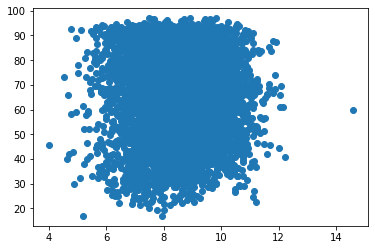

In [40]:
plt.scatter( np.array( embedded_ladec['residual_distance'] ), np.array( embedded_ladec['ratingcmp'] ) )

Text(0.5, 0, 'cmp rating')

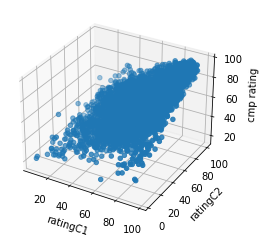

In [45]:
fig = plt.figure()

ax = fig.add_subplot( projection='3d' )

ax.scatter( np.array( embedded_ladec['ratingC1'] ), np.array( embedded_ladec['ratingC2'] ) , np.array( embedded_ladec['ratingcmp'] ))

ax.set_xlabel('ratingC1')
ax.set_ylabel('ratingC2')
ax.set_zlabel('cmp rating')